In [1]:
conda install -c conda-forge category_encoders

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import category_encoders as ce

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import _encoders
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mattdmeans/NFLplayData/master/NFLPlaybyPlay2015.csv', low_memory = False)

In [5]:
df['PlayType']

0        Kickoff
1            Run
2           Pass
3            Run
4           Pass
          ...   
46124       Pass
46125       Pass
46126       Pass
46127       Pass
46128       Pass
Name: PlayType, Length: 46129, dtype: object

In [6]:
df

,Unnamed: 0,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Season
0,36,2015-09-10,2015091000,1,1,NaN,15:00,15,3600.0,0.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
1,51,2015-09-10,2015091000,1,1,1.0,15:00,15,3600.0,0.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
2,72,2015-09-10,2015091000,1,1,1.0,14:21,15,3561.0,39.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
3,101,2015-09-10,2015091000,1,1,2.0,14:04,15,3544.0,17.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
4,122,2015-09-10,2015091000,1,1,1.0,13:26,14,3506.0,38.0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46124,389412,2016-01-03,2016010310,22,4,4.0,00:43,1,43.0,7.0,...,0,NaN,NaN,NaN,0,13.0,19.0,-6.0,6.0,2015
46125,391814,2016-01-03,2016010310,22,4,1.0,00:27,1,27.0,16.0,...,0,NaN,NaN,NaN,0,13.0,19.0,-6.0,6.0,2015
46126,394216,2016-01-03,2016010310,22,4,2.0,00:24,1,24.0,3.0,...,0,NaN,NaN,NaN,0,13.0,19.0,-6.0,6.0,2015
46127,396414,2016-01-03,2016010310,22,4,3.0,00:15,1,15.0,9.0,...,0,NaN,NaN,NaN,0,13.0,19.0,-6.0,6.0,2015


In [7]:
df_rp = df[(df['PlayType'] == 'Run') | (df['PlayType'] == 'Pass')]

In [8]:
df_rp.shape

(31432, 66)

In [9]:
df = df_rp

In [10]:
df.columns

Index(['Unnamed: 0', 'Date', 'GameID', 'Drive', 'qtr', 'down', 'time',
       'TimeUnder', 'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln',
       'yrdline100', 'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam',
       'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp',
       'Touchdown', 'ExPointResult', 'TwoPointConv', 'DefTwoPoint', 'Safety',
       'PuntResult', 'PlayType', 'Passer', 'PassAttempt', 'PassOutcome',
       'PassLength', 'PassLocation', 'InterceptionThrown', 'Interceptor',
       'Rusher', 'RushAttempt', 'RunLocation', 'RunGap', 'Receiver',
       'Reception', 'ReturnResult', 'Returner', 'BlockingPlayer', 'Tackler1',
       'Tackler2', 'FieldGoalResult', 'FieldGoalDistance', 'Fumble',
       'RecFumbTeam', 'RecFumbPlayer', 'Sack', 'Challenge.Replay',
       'ChalReplayResult', 'Accepted.Penalty', 'PenalizedTeam', 'PenaltyType',
       'PenalizedPlayer', 'Penalty.Yards', 'PosTeamScore', 'DefTeamScore',
       'ScoreDiff', 'AbsScoreDiff', 'Season'],

In [11]:
pd.options.display.max_columns = 75

In [12]:
pd.options.display.max_rows = 100

In [13]:
df.head(5)

,Unnamed: 0,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,PuntResult,PlayType,Passer,PassAttempt,PassOutcome,PassLength,PassLocation,InterceptionThrown,Interceptor,Rusher,RushAttempt,RunLocation,RunGap,Receiver,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Season
1,51,2015-09-10,2015091000,1,1,1.0,15:00,15,3600.0,0.0,PIT,20.0,80.0,10,18,0.0,1.0,PIT,NE,(15:00) De.Williams right tackle to PIT 38 for...,1,18,0,0,NaN,NaN,NaN,0,NaN,Run,NaN,0,NaN,NaN,NaN,0,NaN,D.Hightower,1,right,tackle,NaN,0,NaN,NaN,NaN,D.Hightower,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
2,72,2015-09-10,2015091000,1,1,1.0,14:21,15,3561.0,39.0,PIT,38.0,62.0,10,31,0.0,0.0,PIT,NE,(14:21) B.Roethlisberger pass short right to A...,1,9,0,0,NaN,NaN,NaN,0,NaN,Pass,B.Roethlisberger,1,Complete,Short,right,0,NaN,NaN,0,NaN,NaN,A.Brown,1,NaN,NaN,NaN,D.Hightower,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
3,101,2015-09-10,2015091000,1,1,2.0,14:04,15,3544.0,17.0,PIT,47.0,53.0,1,31,0.0,1.0,PIT,NE,(14:04) De.Williams right guard to NE 49 for 4...,1,4,0,0,NaN,NaN,NaN,0,NaN,Run,NaN,0,NaN,NaN,NaN,0,NaN,J.Collins,1,right,guard,NaN,0,NaN,NaN,NaN,J.Collins,M.Brown,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
4,122,2015-09-10,2015091000,1,1,1.0,13:26,14,3506.0,38.0,NE,49.0,49.0,10,45,0.0,1.0,PIT,NE,(13:26) B.Roethlisberger pass short right to H...,1,14,0,0,NaN,NaN,NaN,0,NaN,Pass,B.Roethlisberger,1,Complete,Short,right,0,NaN,NaN,0,NaN,NaN,H.Miller,1,NaN,NaN,NaN,J.Mayo,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015
5,159,2015-09-10,2015091000,1,1,1.0,12:42,13,3462.0,44.0,NE,35.0,35.0,10,56,0.0,1.0,PIT,NE,(12:42) (Shotgun) De.Williams right guard to N...,1,11,0,0,NaN,NaN,NaN,0,NaN,Run,NaN,0,NaN,NaN,NaN,0,NaN,J.Collins,1,right,guard,NaN,0,NaN,NaN,NaN,J.Collins,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2015


In [14]:
df['PlayAttempted'].value_counts()

1    31432
Name: PlayAttempted, dtype: int64

In [15]:
df['FieldGoalResult'].value_counts()

Series([], Name: FieldGoalResult, dtype: int64)

## Change of plans

After looking up how I was going to develope this dataset to fit my question, I think I'd be wasting important time. Instead, I'm changing my question from predicting whether the upcoming playcall will be a run or a pass, to guessing the yardage of any particular play. Which would change my question from one of classification to a continuous one.

In [16]:
first_dropped = ['Unnamed: 0', 'GameID', 'desc', 'PlayAttempted', 'Touchdown', 'ExPointResult', 'DefTwoPoints', 'PuntResult', 
                 'Safety', 'Rusher', 'ReturnResult', 'Returner', 'PassOutcome', 'PassLength', 'InterceptionThrown', 'Interceptor',
                'BlockingPlayer', 'Tackler1', 'Tackler2', 'FieldGoalResult', 'FieldGoalDistance',
                'Fumble', 'RecFumbTeam', 'RecfumbPlayer', ]

In [17]:
df[50:60]

,Unnamed: 0,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,PuntResult,PlayType,Passer,PassAttempt,PassOutcome,PassLength,PassLocation,InterceptionThrown,Interceptor,Rusher,RushAttempt,RunLocation,RunGap,Receiver,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Season
68,1664,2015-09-10,2015091000,7,2,3.0,00:53,1,1853.0,36.0,NE,35.0,35.0,3,48,0.0,0.0,PIT,NE,"(:53) (No Huddle, Shotgun) B.Roethlisberger pa...",1,0,0,0,NaN,NaN,NaN,0,NaN,Pass,B.Roethlisberger,1,Incomplete Pass,Deep,right,0,NaN,NaN,0,NaN,NaN,M.Wheaton,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,14.0,-14.0,14.0,2015
70,1704,2015-09-10,2015091000,7,2,4.0,00:48,1,1848.0,0.0,NE,35.0,35.0,3,52,0.0,0.0,PIT,NE,(:48) (Shotgun) B.Roethlisberger pass short mi...,1,4,0,0,NaN,NaN,NaN,0,NaN,Pass,B.Roethlisberger,1,Complete,Short,middle,0,NaN,NaN,0,NaN,NaN,D.Heyward,1,NaN,NaN,NaN,B.Fletcher,J.Collins,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,14.0,-14.0,14.0,2015
72,1746,2015-09-10,2015091000,7,2,1.0,00:43,1,1843.0,0.0,NE,31.0,31.0,10,57,0.0,0.0,PIT,NE,(:43) (Shotgun) De.Williams left end to NE 26 ...,1,5,0,0,NaN,NaN,NaN,0,NaN,Run,NaN,0,NaN,NaN,NaN,0,NaN,B.Fletcher,1,left,end,NaN,0,NaN,NaN,NaN,B.Fletcher,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,14.0,-14.0,14.0,2015
73,1767,2015-09-10,2015091000,7,2,2.0,00:19,1,1819.0,24.0,NE,26.0,26.0,5,57,0.0,0.0,PIT,NE,"(:19) (No Huddle, Shotgun) B.Roethlisberger pa...",1,0,0,0,NaN,NaN,NaN,0,NaN,Pass,B.Roethlisberger,1,Incomplete Pass,Deep,left,0,NaN,NaN,0,NaN,NaN,D.Heyward,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,14.0,-14.0,14.0,2015
76,1830,2015-09-10,2015091000,7,2,3.0,00:13,1,1813.0,0.0,NE,26.0,26.0,5,57,0.0,0.0,PIT,NE,(:13) (Shotgun) B.Roethlisberger pass incomple...,1,0,0,0,NaN,NaN,NaN,0,NaN,Pass,B.Roethlisberger,1,Incomplete Pass,Short,middle,0,NaN,NaN,0,NaN,NaN,D.Heyward,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,14.0,-14.0,14.0,2015
82,1941,2015-09-10,2015091000,9,3,1.0,15:00,15,1800.0,0.0,NE,20.0,80.0,10,10,0.0,1.0,NE,PIT,(15:00) T.Brady pass short right to J.Edelman ...,1,10,0,0,NaN,NaN,NaN,0,NaN,Pass,T.Brady,1,Complete,Short,right,0,NaN,NaN,0,NaN,NaN,J.Edelman,1,NaN,NaN,NaN,R.Shazier,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,14.0,3.0,11.0,11.0,2015
83,1966,2015-09-10,2015091000,9,3,1.0,14:30,15,1770.0,30.0,NE,30.0,70.0,10,14,0.0,0.0,NE,PIT,(14:30) D.Lewis up the middle to NE 34 for 4 y...,1,4,0,0,NaN,NaN,NaN,0,NaN,Run,NaN,0,NaN,NaN,NaN,0,NaN,D.Lewis,1,middle,NaN,NaN,0,NaN,NaN,NaN,R.Shazier,R.Golden,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,14.0,3.0,11.0,11.0,2015
84,1987,2015-09-10,2015091000,9,3,2.0,14:06,15,1746.0,24.0,NE,34.0,66.0,6,15,0.0,0.0,NE,PIT,(14:06) B.Bolden right end to NE 35 for 1 yard...,1,1,0,0,NaN,NaN,NaN,0,NaN,Run,NaN,0,NaN,NaN,NaN,0,NaN,B.Bolden,1,right,end,NaN,0,NaN,NaN,NaN,R.Shazier,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,14.0,3.0,11.0,11.0,2015
85,2008,2015-09-10,2015091000,9,3,3.0,13:29,14,1709.0,37.0,NE,35.0,65.0,5,25,0.0,1.0,NE,PIT,(13:29) (Shotgun) T.Brady pass short right to ...,1,10,0,0,NaN,NaN,NaN,0,NaN,Pass,T.Brady,1,Complete,Short,right,0,NaN,NaN,0,NaN,NaN,J.Edelman,1,NaN,NaN,NaN,M.Mitchell,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,14.0,3.0,11.0,11.0,2015
86,2032,2015-09-10,2015091000,9,3,1.0,12:55,13,1675.0,34.0,NE,45.0,55.0,10,36,0.0,1.0,NE,PIT,(12:55) D.Lewis left guard to PIT 44 for 11 ya...,1,11,0,0,NaN,NaN,NaN,0,NaN,Run,NaN,0,NaN,NaN,NaN,0,NaN,D.Lewis,1,left,guard,NaN,0,NaN,NaN,NaN,W.Allen,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,14.0,3.0,11.0,11.0,2015


In [18]:
df['PassLocation'].value_counts()

right     7222
left      6818
middle    4153
Name: PassLocation, dtype: int64

In [19]:
pos_drop = ['Passer', 'Rusher', 'Receiver']

In [20]:
features = ['Drive', 'qtr', 'down', 'TimeUnder', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100', 'GoalToGo', 'posteam', 'DefensiveTeam',
           'sp', 'PlayType', 'PassLocation', 'RunLocation', 'RunGap', 'PosTeamScore', 'DefTeamScore', 'ScoreDiff']
target = 'Yards.Gained'

In [21]:
print(df['Yards.Gained'].min())
print(df['Yards.Gained'].max())

-34
90


In [22]:
df[features].isnull().sum()

Drive                0
qtr                  0
down               108
TimeUnder            0
PlayTimeDiff        21
SideofField          0
yrdln                0
yrdline100           0
GoalToGo             0
posteam             21
DefensiveTeam       21
sp                   0
PlayType             0
PassLocation     13239
RunLocation      18473
RunGap           21849
PosTeamScore        21
DefTeamScore        21
ScoreDiff           21
dtype: int64

In [23]:
df[df['down'].isnull()]

,Unnamed: 0,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,PuntResult,PlayType,Passer,PassAttempt,PassOutcome,PassLength,PassLocation,InterceptionThrown,Interceptor,Rusher,RushAttempt,RunLocation,RunGap,Receiver,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Season
102,2380,2015-09-10,2015091000,10,3,NaN,06:43,7,1303.0,5.0,NE,2.0,2.0,0,80,1.0,0.0,PIT,NE,TWO-POINT CONVERSION ATTEMPT. B.Roethlisberger...,1,0,1,0,NaN,Success,NaN,0,NaN,Pass,B.Roethlisberger,1,Complete,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,11.0,21.0,-10.0,10.0,2015
524,3884,2015-09-13,2015091306,26,4,NaN,04:07,5,247.0,9.0,KC,15.0,15.0,0,59,0.0,0.0,HOU,KC,TWO-POINT CONVERSION ATTEMPT. R.Mallett pass t...,1,0,1,0,NaN,Success,NaN,0,NaN,Pass,R.Mallett,1,Complete,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,17.0,27.0,-10.0,10.0,2015
830,3133,2015-09-13,2015091304,13,3,NaN,00:54,1,954.0,3.0,BUF,2.0,2.0,0,65,1.0,0.0,IND,BUF,(Pass formation) TWO-POINT CONVERSION ATTEMPT....,1,0,1,0,NaN,Success,NaN,0,NaN,Pass,A.Luck,1,Complete,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,8.0,24.0,-16.0,16.0,2015
834,3228,2015-09-13,2015091304,14,3,NaN,NaN,1,NaN,NaN,BUF,21.0,21.0,0,-9,0.0,0.0,NaN,NaN,End of quarter - 3.21 pm,1,0,0,0,NaN,NaN,NaN,0,NaN,Run,NaN,0,NaN,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2015
864,3996,2015-09-13,2015091304,18,4,NaN,05:56,6,356.0,4.0,BUF,2.0,2.0,0,80,1.0,0.0,IND,BUF,(Pass formation) TWO-POINT CONVERSION ATTEMPT....,1,0,0,0,NaN,Failure,NaN,0,NaN,Pass,A.Luck,1,Complete,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,14.0,27.0,-13.0,13.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,28887,2015-12-27,2015122710,16,3,NaN,06:31,7,1291.0,10.0,ARI,2.0,2.0,0,80,1.0,0.0,GB,ARI,(Pass formation) TWO-POINT CONVERSION ATTEMPT....,1,0,1,0,NaN,Success,NaN,0,NaN,Pass,A.Rodgers,1,Complete,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,8.0,30.0,-22.0,22.0,2015
43300,11459,2016-01-03,2016010300,8,1,NaN,NaN,1,NaN,NaN,NYJ,31.0,31.0,0,48,0.0,0.0,NaN,NaN,End of quarter - 1.42 pm,1,0,0,0,NaN,NaN,NaN,0,NaN,Run,NaN,0,NaN,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2015
43391,34048,2016-01-03,2016010300,18,3,NaN,NaN,1,NaN,NaN,BUF,28.0,28.0,0,8,0.0,0.0,NaN,NaN,End of quarter - 3.27 pm,1,0,0,0,NaN,NaN,NaN,0,NaN,Run,NaN,0,NaN,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2015
43437,45186,2016-01-03,2016010300,24,4,NaN,NaN,1,NaN,NaN,NYJ,40.0,40.0,0,-1,0.0,0.0,NaN,NaN,End of game - 4.06 pm,1,0,0,0,NaN,NaN,NaN,0,NaN,Run,NaN,0,NaN,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2015


In [24]:
df[features].dtypes

Drive              int64
qtr                int64
down             float64
TimeUnder          int64
PlayTimeDiff     float64
SideofField       object
yrdln            float64
yrdline100       float64
GoalToGo         float64
posteam           object
DefensiveTeam     object
sp                 int64
PlayType          object
PassLocation      object
RunLocation       object
RunGap            object
PosTeamScore     float64
DefTeamScore     float64
ScoreDiff        float64
dtype: object

In [41]:
df['RunGap'].unique()

array(['tackle', nan, 'guard', 'end'], dtype=object)

In [25]:
train, test = train_test_split(df, train_size = .8, test_size = .2, random_state = 42)

train.shape, test.shape

((25145, 66), (6287, 66))

In [26]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [27]:
num_features = X_train.select_dtypes(include = 'number').columns.tolist()

In [28]:
for col in num_features:
    print(X_train[col].min(), X_train[col].max())

1 33
1 5
1.0 4.0
0 15
0.0 940.0
1.0 50.0
1.0 99.0
0.0 1.0
0 1
0.0 50.0
0.0 51.0
-41.0 40.0


In [29]:
df['Yards.Gained'].mean(), df['Yards.Gained'].median()

(6.057870959531687, 3.0)

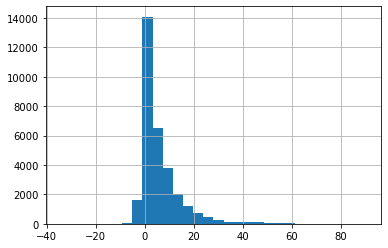

In [30]:
df['Yards.Gained'].hist(bins = 30)

In [31]:
lr = LogisticRegression()

In [33]:
%%time

pipe = make_pipeline(
    ce.OrdinalEncoder(handle_unknown= 'ignore'),
    SimpleImputer(strategy='median'),
    LogisticRegression(random_state= 42, n_jobs= -1)
)

pipe.fit(X_train, y_train)

print('Accuracy score for Testing Dataset = ', accuracy_score(X_test, y_test))

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:

from xgboost import XGBClassifier

pipeline_ = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(random_state=0, n_jobs=-1)
)

pipeline_.fit(X_train, y_train)
print('Validation Accuracy', pipeline_.score(X_val, y_val))
print('Test Accuracy', pipeline_.score(X_test, y_test))

In [ ]:
# Get feature importances
n1 = len(X_train.columns)
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_[0:n1], X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue')

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# Ignore warnings

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)



feature_names = X_val.columns.tolist()

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)